In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import yfinance as yf

In [ ]:
import torch
import random
import numpy as np

# Atur random seed untuk Python
random_seed = 100
random.seed(random_seed)

# Atur random seed untuk NumPy
np.random.seed(random_seed)

# Atur random seed untuk PyTorch (dalam hal penggunaan GPU)
torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(random_seed)


In [ ]:
# Define the ticker symbol for Gold
tick = 'GOTO.JK'

# Define the date range for which you want to retrieve data
start_date = '2022-04-11'
end_date = '2023-09-27'

# Retrieve daily data for Gold
data = yf.download(tick, start=start_date, end=end_date)

# Reset the index to use the default integer index
data.reset_index(inplace=True)

# Display the DataFrame with the default integer index
print(data)


[*********************100%%**********************]  1 of 1 completed
          Date   Open   High    Low  Close  Adj Close      Volume
0   2022-04-11  400.0  416.0  372.0  382.0      382.0  9410897000
1   2022-04-12  422.0  442.0  360.0  370.0      370.0  3887331000
2   2022-04-13  370.0  380.0  360.0  374.0      374.0  3262811400
3   2022-04-14  374.0  382.0  374.0  376.0      376.0  3675981900
4   2022-04-18  376.0  380.0  370.0  378.0      378.0  2660312700
..         ...    ...    ...    ...    ...        ...         ...
348 2023-09-20   90.0   93.0   90.0   90.0       90.0  1687125100
349 2023-09-21   90.0   91.0   87.0   88.0       88.0  1530818800
350 2023-09-22   88.0   90.0   87.0   87.0       87.0  1058373800
351 2023-09-25   88.0   89.0   87.0   87.0       87.0  1603642100
352 2023-09-26   91.0   92.0   87.0   87.0       87.0  5154826100

[353 rows x 7 columns]


In [ ]:
data = data[['Date', 'Close']]
data

,Date,Close
0,2022-04-11,382.0
1,2022-04-12,370.0
2,2022-04-13,374.0
3,2022-04-14,376.0
4,2022-04-18,378.0
...,...,...
348,2023-09-20,90.0
349,2023-09-21,88.0
350,2023-09-22,87.0
351,2023-09-25,87.0


In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

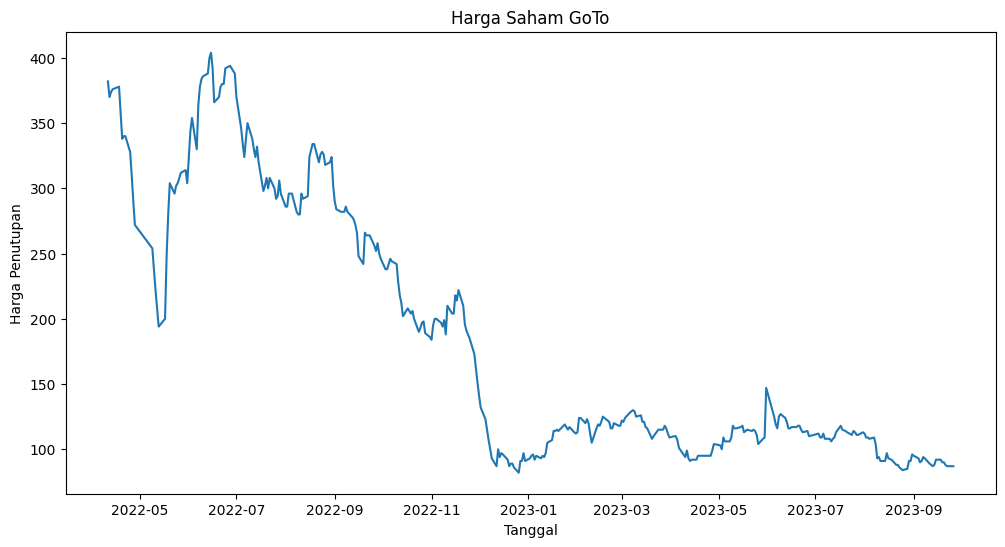

In [ ]:
# Assuming you've already converted the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the figure size
plt.figure(figsize=(12, 6))  # Adjust the width (12) and height (6) as needed

# Plot the data
plt.plot(data['Date'], data['Close'])

# Add labels and title (if needed)
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.title('Harga Saham GoTo')

# Display the plot
plt.show()


In [ ]:
from copy import deepcopy as dc
from tensorflow.keras.layers import GRU
from tensorflow.keras.models import Sequential

def prepare_dataframe_for_gru(df, n_steps):
    df = dc(df)

    df.set_index('Date', inplace=True)

    for i in range(1, n_steps + 1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 7
shifted_df = prepare_dataframe_for_gru(data, lookback)
shifted_df


,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
2022-04-21,340.0,338.0,358.0,378.0,376.0,374.0,370.0,382.0
2022-04-22,340.0,340.0,338.0,358.0,378.0,376.0,374.0,370.0
2022-04-25,328.0,340.0,340.0,338.0,358.0,378.0,376.0,374.0
2022-04-26,310.0,328.0,340.0,340.0,338.0,358.0,378.0,376.0
2022-04-27,290.0,310.0,328.0,340.0,340.0,338.0,358.0,378.0
...,...,...,...,...,...,...,...,...
2023-09-20,90.0,90.0,92.0,92.0,88.0,87.0,88.0,89.0
2023-09-21,88.0,90.0,90.0,92.0,92.0,88.0,87.0,88.0
2023-09-22,87.0,88.0,90.0,90.0,92.0,92.0,88.0,87.0


In [ ]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[340., 338., 358., ..., 374., 370., 382.],
       [340., 340., 338., ..., 376., 374., 370.],
       [328., 340., 340., ..., 378., 376., 374.],
       ...,
       [ 87.,  88.,  90., ...,  92.,  88.,  87.],
       [ 87.,  87.,  88., ...,  92.,  92.,  88.],
       [ 87.,  87.,  87., ...,  90.,  92.,  92.]])

In [ ]:
shifted_df_as_np.shape

(346, 8)

In [ ]:
# Scaling Data Better
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[ 0.60248447,  0.59006211,  0.71428571, ...,  0.8136646 ,
         0.78881988,  0.86335404],
       [ 0.60248447,  0.60248447,  0.59006211, ...,  0.82608696,
         0.8136646 ,  0.78881988],
       [ 0.52795031,  0.60248447,  0.60248447, ...,  0.83850932,
         0.82608696,  0.8136646 ],
       ...,
       [-0.9689441 , -0.96273292, -0.95031056, ..., -0.9378882 ,
        -0.96273292, -0.9689441 ],
       [-0.9689441 , -0.9689441 , -0.96273292, ..., -0.9378882 ,
        -0.9378882 , -0.96273292],
       [-0.9689441 , -0.9689441 , -0.9689441 , ..., -0.95031056,
        -0.9378882 , -0.9378882 ]])

In [ ]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((346, 7), (346,))

In [ ]:
X = dc(np.flip(X, axis=1))
X

array([[ 0.86335404,  0.78881988,  0.8136646 , ...,  0.83850932,
         0.71428571,  0.59006211],
       [ 0.78881988,  0.8136646 ,  0.82608696, ...,  0.71428571,
         0.59006211,  0.60248447],
       [ 0.8136646 ,  0.82608696,  0.83850932, ...,  0.59006211,
         0.60248447,  0.60248447],
       ...,
       [-0.9689441 , -0.96273292, -0.9378882 , ..., -0.95031056,
        -0.95031056, -0.96273292],
       [-0.96273292, -0.9378882 , -0.9378882 , ..., -0.95031056,
        -0.96273292, -0.9689441 ],
       [-0.9378882 , -0.9378882 , -0.95031056, ..., -0.96273292,
        -0.9689441 , -0.9689441 ]])

In [ ]:
split_index = int(len(X) * 0.80)

split_index

276

In [ ]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276, 7), (70, 7), (276,), (70,))

In [ ]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((276, 7, 1), (70, 7, 1), (276, 1), (70, 1))

In [ ]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([276, 7, 1]),
 torch.Size([70, 7, 1]),
 torch.Size([276, 1]),
 torch.Size([70, 1]))

In [ ]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [ ]:
train_dataset

In [ ]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [ ]:
import torch
import torch.nn as nn

class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers, output_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.gru = nn.GRU(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(x.device)

        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Buat model GRU Anda
input_size = 1
hidden_size = 4
num_layers = 2
output_size = 1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Choose the appropriate device

model = GRUModel(input_size, hidden_size, num_layers, output_size)
model.to(device)

# Cetak model
print(model)

# Hitung jumlah parameter
total_params = sum(p.numel() for p in model.parameters())
print(f"Total Parameters: {total_params}")

GRUModel(
  (gru): GRU(1, 4, num_layers=2, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)
Total Parameters: 209


Epoch: 1
Val Loss: 0.175
***************************************************

Epoch: 2
Val Loss: 0.181
***************************************************

Epoch: 3
Val Loss: 0.166
***************************************************

Epoch: 4
Val Loss: 0.128
***************************************************

Epoch: 5
Val Loss: 0.080
***************************************************

Epoch: 6
Val Loss: 0.038
***************************************************

Epoch: 7
Val Loss: 0.016
***************************************************

Epoch: 8
Val Loss: 0.006
***************************************************

Epoch: 9
Val Loss: 0.003
***************************************************

Epoch: 10
Val Loss: 0.003
***************************************************



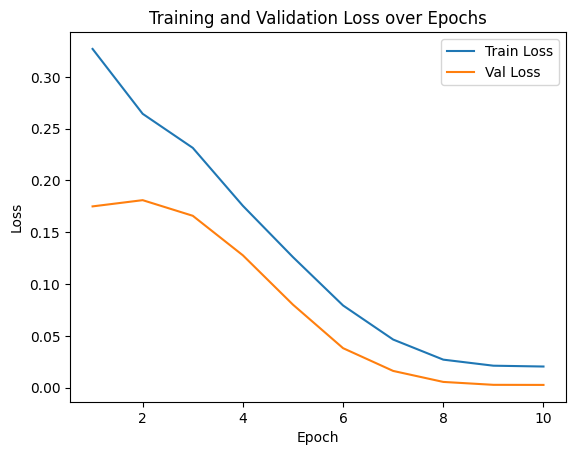

In [ ]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        optimizer.zero_grad()
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index + 1, avg_loss_across_batches))
            running_loss = 0.0

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    running_loss = 0.0

    with torch.no_grad():
        for batch_index, batch in enumerate(test_loader):
            x_batch, y_batch = batch[0].to(device), batch[1].to(device)

            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    val_loss = running_loss / len(test_loader)
    val_losses.append(val_loss)

    print(f'Val Loss: {val_loss:.3f}')
    print('***************************************************')
    print()

# Plot loss function
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

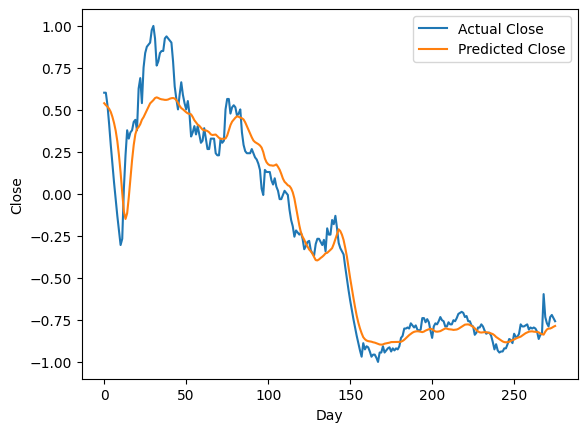

In [ ]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([329.93291175, 328.06319773, 326.60042644, 324.62682235,
       321.5747951 , 316.8990514 , 311.01150969, 303.6585193 ,
       293.60250643, 280.12961796, 263.44839212, 244.11945716,
       226.25853309, 219.01368394, 224.43689197, 239.84846821,
       258.00858721, 275.36465701, 289.85687914, 300.18729958,
       305.31036744, 307.14204153, 309.86250058, 314.06328264,
       316.53240374, 319.81661943, 323.29371211, 326.61814129,
       329.758834  , 331.383726  , 332.8830018 , 334.85779583,
       335.54170835, 334.91610324, 334.11100805, 333.66295457,
       333.44790041, 333.12367821, 333.14271736, 333.49542153,
       334.25514519, 334.74321544, 334.92209136, 334.41290915,
       332.87378931, 330.43305421, 327.44467473, 325.25601649,
       324.09919596, 322.70271143, 321.2846975 , 320.16304758,
       319.78955773, 319.22711578, 316.71161553, 313.60879001,
       311.48092464, 309.46328291, 308.30685583, 306.50024739,
       304.6475189 , 303.89256462, 303.86768129, 303.20

In [ ]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([339.99999881, 339.99999881, 327.99999619, 310.00000185,
       289.99999908, 271.99999994, 253.99999961, 237.99999991,
       222.00000021, 208.00000115, 194.00000209, 199.9999986 ,
       248.00000009, 280.00000009, 304.00000054, 296.00000039,
       302.0000017 , 304.00000054, 312.00000069, 313.99999952,
       304.00000054, 343.99999648, 353.99999547, 329.99999982,
       364.00000405, 378.00000072, 384.00000203, 385.99999607,
       387.9999997 , 400.00000232, 404.        , 391.99999738,
       365.99999809, 369.99999577, 378.00000072, 380.00000435,
       380.00000435, 391.99999738, 394.00000101, 391.99999738,
       390.00000334, 387.9999997 , 369.99999577, 346.00000012,
       333.9999975 , 323.99999851, 338.00000477, 349.99999779,
       338.00000477, 329.99999982, 323.99999851, 332.00000346,
       320.00000083, 297.99999923, 302.0000017 , 307.99999821,
       299.99999806, 307.99999821, 299.99999806, 291.99999791,
       294.00000155, 305.99999937, 296.00000039, 286.00

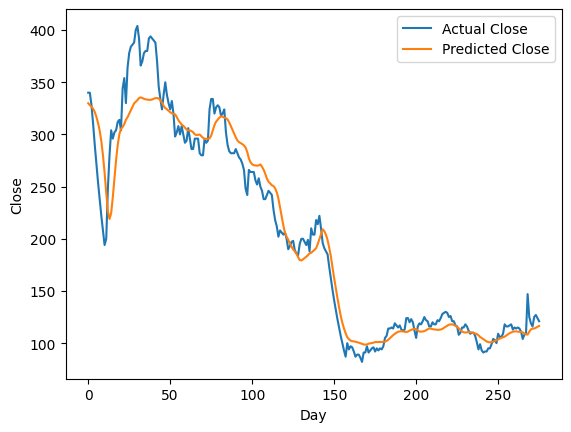

In [ ]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(new_y_train, train_predictions)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(new_y_train, train_predictions)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(np.array(new_y_train) - np.array(train_predictions)))
print(f"Mean Absolute Deviation (MAD): {mad:.2f}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((np.array(new_y_train) - np.array(train_predictions)) / np.array(new_y_train)) * 100)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 16.02
Mean Squared Error (MSE): 532.21
Mean Absolute Deviation (MAD): 16.02
Mean Absolute Percentage Error (MAPE): 7.72%


In [ ]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([115.20094514, 114.4803074 , 113.84095073, 113.44331646,
       112.8131243 , 112.33906472, 112.12287819, 111.8254298 ,
       111.4783299 , 111.152246  , 110.54045963, 110.06158268,
       109.440651  , 108.84623402, 108.67020822, 108.39864117,
       108.03479564, 107.67652559, 107.39019936, 107.38281977,
       107.74757695, 108.50921029, 109.2677536 , 109.75515211,
       110.05927956, 110.01559699, 110.09373045, 110.04136318,
       109.66952389, 109.38861001, 109.32066786, 109.29335666,
       109.09663153, 108.71498477, 108.31980717, 108.10035789,
       107.57837415, 106.12909532, 104.65181434, 103.28466105,
       102.12649703, 101.64015412, 101.15999126, 100.77488983,
       100.41387522,  99.96307719,  99.517941  ,  99.05700922,
        98.45499194,  98.10002303,  98.23329711,  98.60745871,
        99.27617061,  99.93720543, 100.36002052, 100.45444858,
       100.46481264, 100.53281236, 100.63027287, 100.33188403,
        99.92628479,  99.51588738,  99.28582454,  99.36

In [ ]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([116.00000423, 116.00000423, 117.00000125, 117.00000125,
       117.99999827, 117.99999827, 114.99999762, 113.00000358,
       114.0000006 , 110.00000292, 111.99999696, 108.9999963 ,
       108.9999963 , 111.99999696, 107.99999928, 107.99999928,
       105.99999565, 107.99999928, 108.9999963 , 113.00000358,
       117.99999827, 114.99999762, 114.0000006 , 113.00000358,
       110.99999994, 114.0000006 , 113.00000358, 110.99999994,
       110.99999994, 113.00000358, 111.99999696, 108.9999963 ,
       108.9999963 , 107.99999928, 108.9999963 , 104.00000161,
        92.99999601,  94.00000262,  91.00000197,  91.00000197,
        97.00000328,  92.99999601,  91.99999899,  88.00000131,
        88.00000131,  85.99999768,  85.00000066,  84.00000364,
        85.00000066,  91.00000197,  91.00000197,  95.99999666,
        94.99999964,  92.99999601,  89.99999535,  91.00000197,
        94.00000262,  92.99999601,  88.99999833,  88.00000131,
        87.00000429,  88.00000131,  91.99999899,  91.99

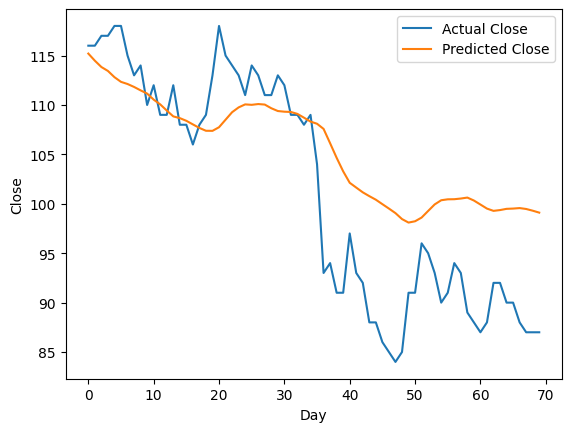

In [ ]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(new_y_test, test_predictions)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(new_y_test, test_predictions)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate Mean Absolute Deviation (MAD)
mad = np.mean(np.abs(np.array(new_y_test) - np.array(test_predictions)))
print(f"Mean Absolute Deviation (MAD): {mad:.2f}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((np.array(new_y_test) - np.array(test_predictions)) / np.array(new_y_test))) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 6.31
Mean Squared Error (MSE): 62.09
Mean Absolute Deviation (MAD): 6.31
Mean Absolute Percentage Error (MAPE): 6.75%


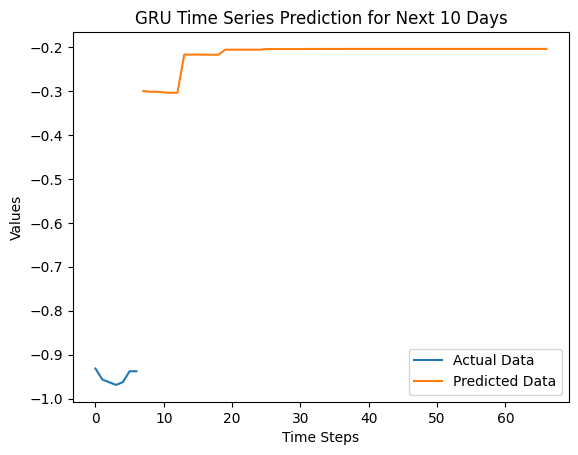

In [ ]:
# Fungsi untuk melakukan prediksi 10 hari ke depan setelah pelatihan
def predict_future(model, initial_sequence, num_steps=10):
    current_sequence = initial_sequence

    # Model di set ke mode evaluasi
    model.eval()

    # Melakukan prediksi 10 hari ke depan
    predictions = []

    for _ in range(num_steps):
        with torch.no_grad():
            # Menggunakan model untuk mendapatkan prediksi berikutnya
            prediction = model(current_sequence)
            predictions.append(prediction.cpu().numpy())

            # Memperbarui urutan saat ini dengan menambahkan prediksi ke belakang
            current_sequence = torch.cat([current_sequence[:, 1:], prediction.unsqueeze(1)], dim=1)

    return predictions

# Menggunakan model yang telah dilatih untuk membuat prediksi 10 hari ke depan
model.eval()
with torch.no_grad():
    # Mengambil urutan terakhir dari data pelatihan sebagai awal prediksi
    initial_sequence = x_batch[:, -1:, :].to(device)
    predictions = predict_future(model, initial_sequence, num_steps=10)

# Visualisasi hasil prediksi
actual_data = x_batch[0, :, 0].cpu().numpy()
predicted_data = np.concatenate(predictions).flatten()

# Sumbu x untuk data aktual
x_actual = range(len(actual_data))

# Sumbu x untuk data prediksi (10 hari ke depan)
x_predicted = range(len(x_actual), len(x_actual) + len(predicted_data))

plt.plot(x_actual, actual_data, label='Actual Data')
plt.plot(x_predicted, predicted_data, label='Predicted Data')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('GRU Time Series Prediction for Next 10 Days')
plt.legend()
plt.show()

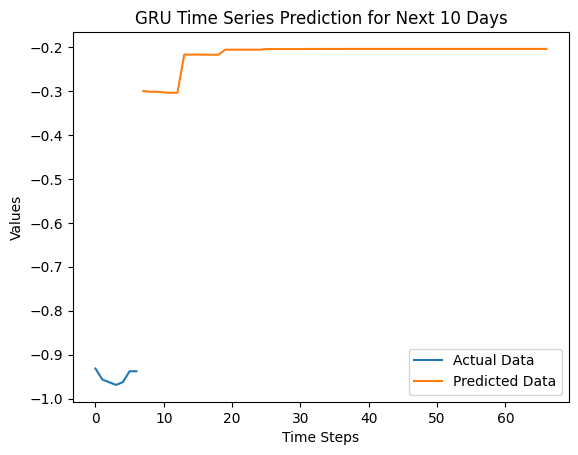

In [ ]:
# Menggunakan model yang telah dilatih untuk membuat prediksi 10 hari ke depan
model.eval()
with torch.no_grad():
    # Mengambil urutan terakhir dari data pelatihan sebagai awal prediksi
    initial_sequence = x_batch[:, -1:, :].to(device)
    predictions = predict_future(model, initial_sequence, num_steps=10)

# Visualisasi hasil prediksi
actual_data = x_batch[0, :, 0].cpu().numpy()
predicted_data = np.concatenate(predictions).flatten()

# Sumbu x untuk data aktual
x_actual = range(len(actual_data))

# Sumbu x untuk data prediksi (10 hari ke depan)
x_predicted = range(len(x_actual), len(x_actual) + len(predicted_data))

plt.plot(x_actual, actual_data, label='Actual Data')
plt.plot(x_predicted, predicted_data, label='Predicted Data')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('GRU Time Series Prediction for Next 10 Days')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from datetime import timedelta

# Fungsi untuk membaca dataset
def read_data():
    # Gantilah ini dengan cara membaca dataset Anda
    # Sebagai contoh, kita membuat dataset dummy di sini
    data = pd.DataFrame({
        'timestamp': pd.date_range(start='2023-01-01', periods=100, freq='D'),
        'value': np.sin(np.linspace(0, 2*np.pi, 100)) + np.random.normal(0, 0.2, 100)
    })
    return data

# Fungsi untuk membuat prediksi berdasarkan model GRU yang telah dilatih
def predict_future_with_dates(model, initial_sequence, num_steps=10):
    current_sequence = initial_sequence

    # Model di set ke mode evaluasi
    model.eval()

    # Melakukan prediksi 10 hari ke depan
    predictions = []

    for _ in range(num_steps):
        with torch.no_grad():
            # Menggunakan model untuk mendapatkan prediksi berikutnya
            prediction = model(current_sequence)
            predictions.append(prediction.item())

            # Memperbarui urutan saat ini dengan menambahkan prediksi ke belakang
            current_sequence = torch.cat([current_sequence[:, 1:], prediction.unsqueeze(1)], dim=1)

    return predictions

# Membaca dataset
data = read_data()

# Menentukan dimensi input, hidden, dan output untuk model GRU
input_size = 1
hidden_size = 64
output_size = 1

# Membuat model GRU
model = GRUModel(input_size, hidden_size, output_size)

# Membaca data terakhir untuk membuat prediksi
last_timestamp = data['timestamp'].max()
last_value = data[data['timestamp'] == last_timestamp]['value'].values[0]

# Membuat urutan awal untuk prediksi
initial_sequence = torch.tensor([[last_value]], dtype=torch.float32).unsqueeze(0).to(device)

# Membuat prediksi 10 hari ke depan
predictions = predict_future_with_dates(model, initial_sequence, num_steps=10)

# Menghasilkan tanggal untuk prediksi (10 hari ke depan dari tanggal terakhir)
future_dates = [last_timestamp + timedelta(days=i) for i in range(1, 11)]

# Memvisualisasikan hasil prediksi
plt.plot(data['timestamp'], data['value'], label='Actual Data')
plt.plot(future_dates, predictions, label='Predicted Data')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('GRU Time Series Prediction for Next 10 Days')
plt.legend()
plt.show()
